In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
urlretrieve(url, "magic04.data")

column_names = [
    "fLength", "fWidth", "fSize", "fConc", "fConc1",
    "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"
]

"""
fLength: major axis of ellipse
fWidth: minor axis of ellipse
fSize: 10-log of sum of content of all pixels
fConc: ratio of sum of two highest pixels over fSize
fConc1: ratio of highest pixel over fSize
fAsym: distance from highest pixel to center, projected onto major axis
fM3Long: 3rd root of third moment along major axis
fM3Trans: 3rd root of third moment along minor axis 
fAlpha: angle of major axis with vector to origin
fDist: distance from origin to center of ellipse
class: g (signal), h (background)
"""

dataset = pd.read_csv("magic04.data", header=None, names=column_names, delimiter=',')

print(dataset.head())

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


In [2]:
#анализ датасета
dataset.head()
dataset.info()
dataset.describe()

print ("\n check for null values \n")
dataset.isnull().sum()

print("Shape of dataset:", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB

 check for null values 

Shape of dataset: (19020, 11)


Столбец fLength:
          Количество  Проценты
20.7522            3  0.015773
24.8332            3  0.015773
26.9187            3  0.015773
19.1572            3  0.015773
12.9176            3  0.015773
...              ...       ...
29.4859            1  0.005258
24.2378            1  0.005258
20.4820            1  0.005258
31.2490            1  0.005258
187.1814           1  0.005258

[18643 rows x 2 columns]



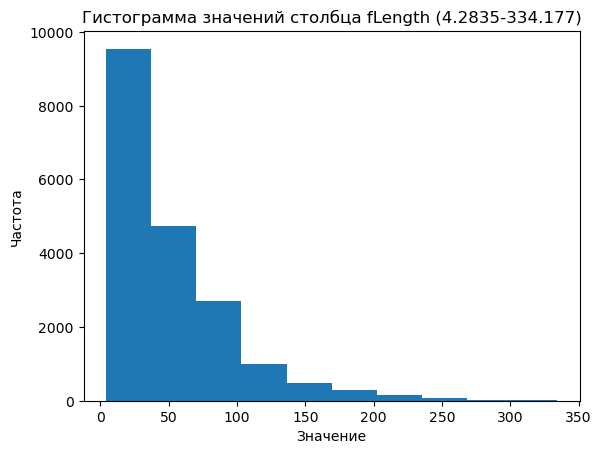

Столбец fWidth:
         Количество  Проценты
0.0000           98  0.515247
10.7539           4  0.021030
0.0001            3  0.015773
10.0342           3  0.015773
15.8644           3  0.015773
...             ...       ...
7.0834            1  0.005258
14.8631           1  0.005258
18.8241           1  0.005258
15.5129           1  0.005258
53.0014           1  0.005258

[18200 rows x 2 columns]



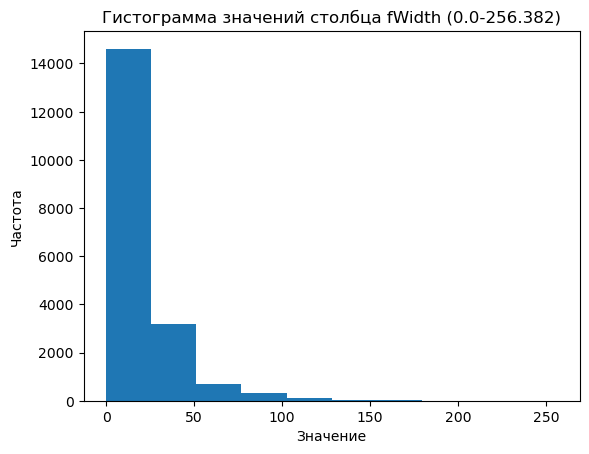

Столбец fSize:
        Количество  Проценты
2.1508          27  0.141956
2.1287          24  0.126183
2.0774          24  0.126183
2.1319          23  0.120925
2.1414          22  0.115668
...            ...       ...
3.4867           1  0.005258
3.5619           1  0.005258
3.5105           1  0.005258
3.9986           1  0.005258
3.2093           1  0.005258

[7228 rows x 2 columns]



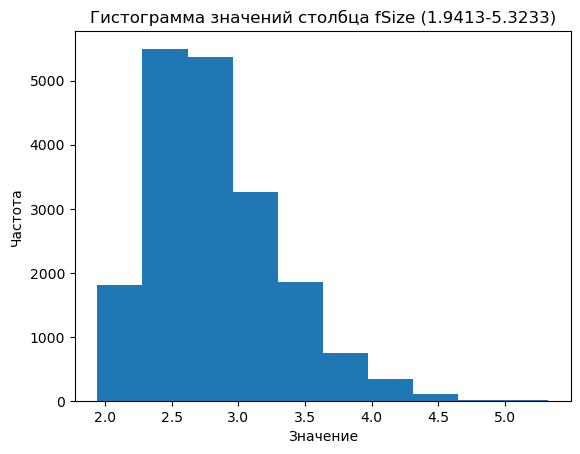

Столбец fConc:
        Количество  Проценты
0.6000          16  0.084122
0.4000          12  0.063091
0.4116          12  0.063091
0.2979          12  0.063091
0.2175          11  0.057834
...            ...       ...
0.8443           1  0.005258
0.1962           1  0.005258
0.7212           1  0.005258
0.8024           1  0.005258
0.0944           1  0.005258

[6410 rows x 2 columns]



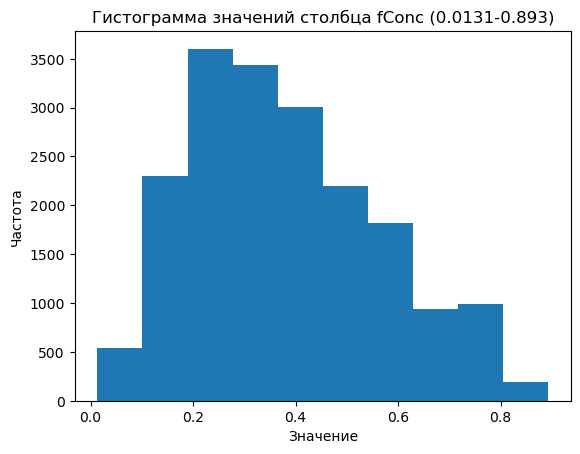

Столбец fConc1:
        Количество  Проценты
0.1940          18  0.094637
0.2126          16  0.084122
0.1939          16  0.084122
0.2000          16  0.084122
0.2170          15  0.078864
...            ...       ...
0.3652           1  0.005258
0.3588           1  0.005258
0.5390           1  0.005258
0.4028           1  0.005258
0.3934           1  0.005258

[4421 rows x 2 columns]



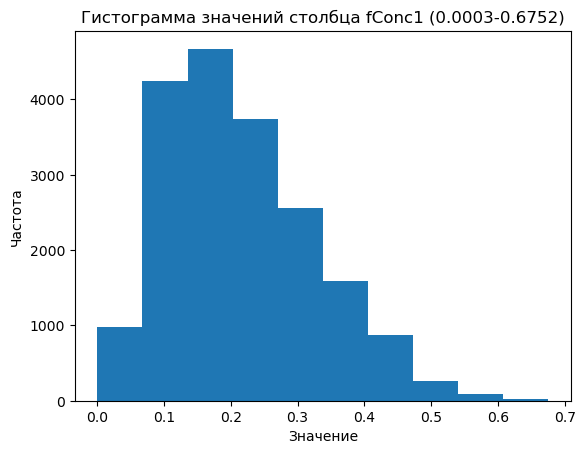

Столбец fAsym:
           Количество  Проценты
 0.0000            41  0.215563
-0.0001             7  0.036803
 8.8077             3  0.015773
 7.1088             3  0.015773
-1.4761             3  0.015773
...               ...       ...
 17.0059            1  0.005258
-69.2489            1  0.005258
-36.3157            1  0.005258
 17.1615            1  0.005258
-167.3125           1  0.005258

[18704 rows x 2 columns]



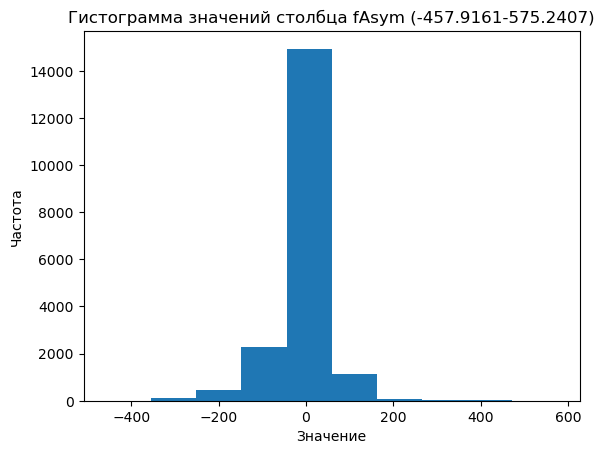

Столбец fM3Long:
           Количество  Проценты
 0.0000            39  0.205047
-0.0001             4  0.021030
 16.0747            3  0.015773
-10.7301            2  0.010515
 20.1723            2  0.010515
...               ...       ...
 64.7447            1  0.005258
-23.8238            1  0.005258
 35.8239            1  0.005258
 65.0778            1  0.005258
-168.4558           1  0.005258

[18693 rows x 2 columns]



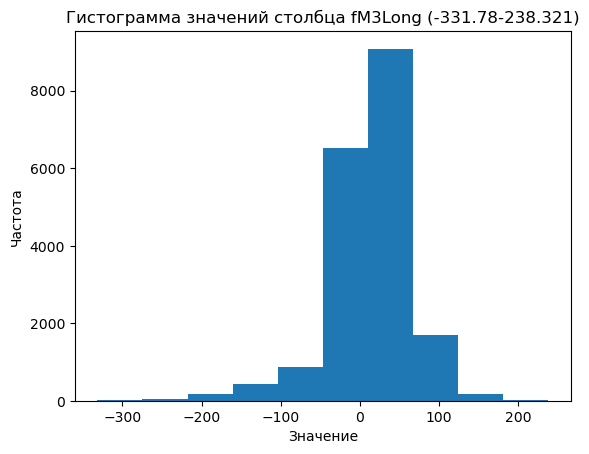

Столбец fM3Trans:
          Количество  Проценты
 0.0000           59  0.310200
-0.0001           24  0.126183
 0.0001           18  0.094637
-5.4454            3  0.015773
-7.6601            3  0.015773
...              ...       ...
-19.0553           1  0.005258
 25.9286           1  0.005258
 9.8753            1  0.005258
-13.9368           1  0.005258
 31.4755           1  0.005258

[18390 rows x 2 columns]



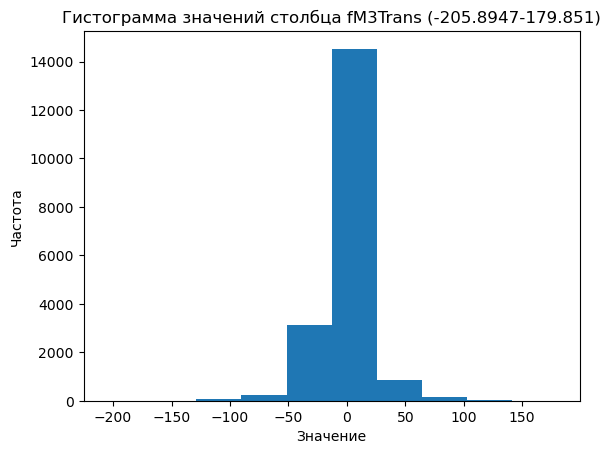

Столбец fAlpha:
         Количество  Проценты
0.0002            7  0.036803
0.0000            5  0.026288
0.3860            4  0.021030
1.2900            4  0.021030
90.0000           4  0.021030
...             ...       ...
17.7197           1  0.005258
1.3133            1  0.005258
5.4315            1  0.005258
9.4633            1  0.005258
52.7310           1  0.005258

[17981 rows x 2 columns]



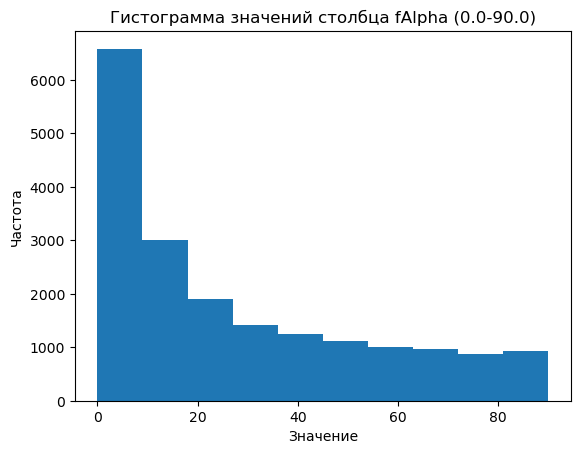

Столбец fDist:
          Количество  Проценты
182.0130           3  0.015773
227.1070           3  0.015773
265.2380           3  0.015773
146.3540           3  0.015773
186.8280           3  0.015773
...              ...       ...
208.2240           1  0.005258
212.2100           1  0.005258
217.1500           1  0.005258
173.7970           1  0.005258
272.3174           1  0.005258

[18437 rows x 2 columns]



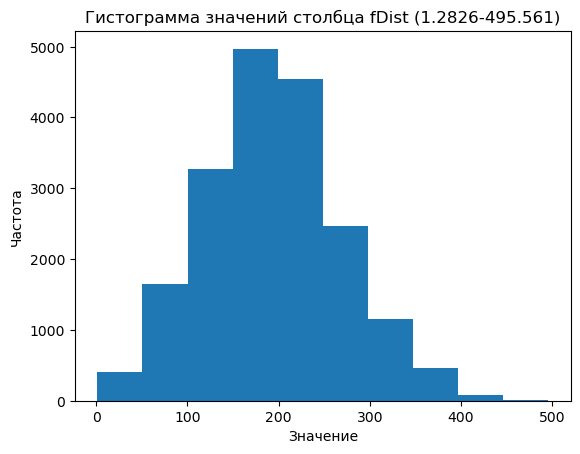

Столбец class:
   Количество   Проценты
g       12332  64.837014
h        6688  35.162986



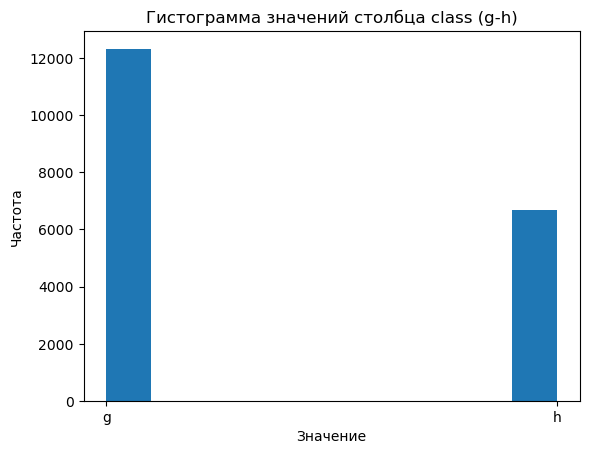

In [3]:
#анализ признаков 
#гистограммы для всех признаков
import matplotlib.pyplot as plt
columns_to_plot = dataset.columns[:]

for column in columns_to_plot:
    value_counts = dataset[column].value_counts()
    value_percentages = value_counts / len(dataset) * 100
    print(f"Столбец {column}:\n{pd.concat([value_counts, value_percentages], axis=1, keys=['Количество', 'Проценты'])}\n")
    plt.hist(dataset[column])
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма значений столбца {column} ({min(dataset[column])}-{max(dataset[column])})')
    plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X = dataset.drop("class", axis=1)
y = dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (15216, 10)
y_train: (15216,)
X_test: (3804, 10)
y_test: (3804,)


In [5]:
import random

def add_noise(y_train, noise_level):
    y_train_noisy = y_train.copy()
    num_to_change = int(noise_level * len(y_train))
    
    indices = random.sample(range(len(y_train)), num_to_change)
    for idx in indices:
        y_train_noisy.iloc[idx] = 'g' if y_train_noisy.iloc[idx] == 'h' else 'h'
    
    return y_train_noisy

noise_levels = [0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_train_noisy_list = []

for noise_level in noise_levels:
    y_train_noisy = add_noise(y_train, noise_level)
    y_train_noisy_list.append(y_train_noisy)

for i, noise_level in enumerate(noise_levels):
    print(f"Разметка с уровнем шума {noise_level * 100}%")
    print(y_train_noisy_list[i])
    print()

Разметка с уровнем шума 0.0%
2499     g
7958     g
7664     g
218      g
14575    h
        ..
11284    g
11964    g
5390     g
860      g
15795    h
Name: class, Length: 15216, dtype: object

Разметка с уровнем шума 5.0%
2499     g
7958     g
7664     g
218      g
14575    h
        ..
11284    g
11964    g
5390     g
860      g
15795    h
Name: class, Length: 15216, dtype: object

Разметка с уровнем шума 10.0%
2499     g
7958     g
7664     g
218      g
14575    h
        ..
11284    g
11964    g
5390     g
860      h
15795    h
Name: class, Length: 15216, dtype: object

Разметка с уровнем шума 15.0%
2499     g
7958     g
7664     g
218      h
14575    h
        ..
11284    g
11964    h
5390     g
860      g
15795    h
Name: class, Length: 15216, dtype: object

Разметка с уровнем шума 20.0%
2499     g
7958     g
7664     g
218      g
14575    h
        ..
11284    g
11964    h
5390     g
860      g
15795    h
Name: class, Length: 15216, dtype: object

Разметка с уровнем шума 30.0%
24

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


def train_and_evaluate_metrics(models, X_train, y_train_noisy, X_test, y_test):
    metrics_scores = {metric_name: {} for metric_name in ['accuracy', 'precision', 'recall', 'f1']}
    for name, model in models.items():
        model.fit(X_train, y_train_noisy)
        y_pred = model.predict(X_test)
        metrics_scores['accuracy'][name] = accuracy_score(y_test, y_pred)
        metrics_scores['precision'][name] = precision_score(y_test, y_pred, pos_label='h')
        metrics_scores['recall'][name] = recall_score(y_test, y_pred, pos_label='h')
        metrics_scores['f1'][name] = f1_score(y_test, y_pred, pos_label='h')
    return metrics_scores


results = []
for i, noise_level in enumerate(noise_levels):
    y_train_noisy = y_train_noisy_list[i]
    metrics_scores = train_and_evaluate_metrics(models, X_train, y_train_noisy, X_test, y_test)
    results.append(metrics_scores)

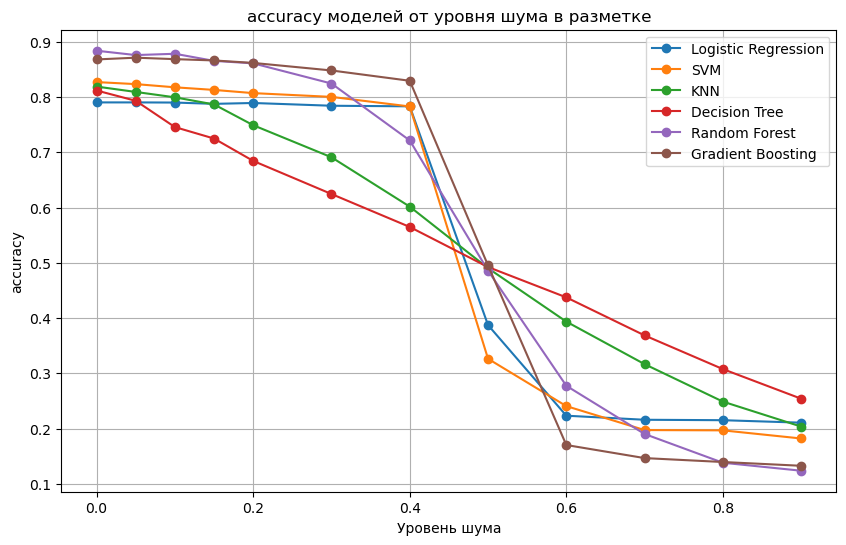

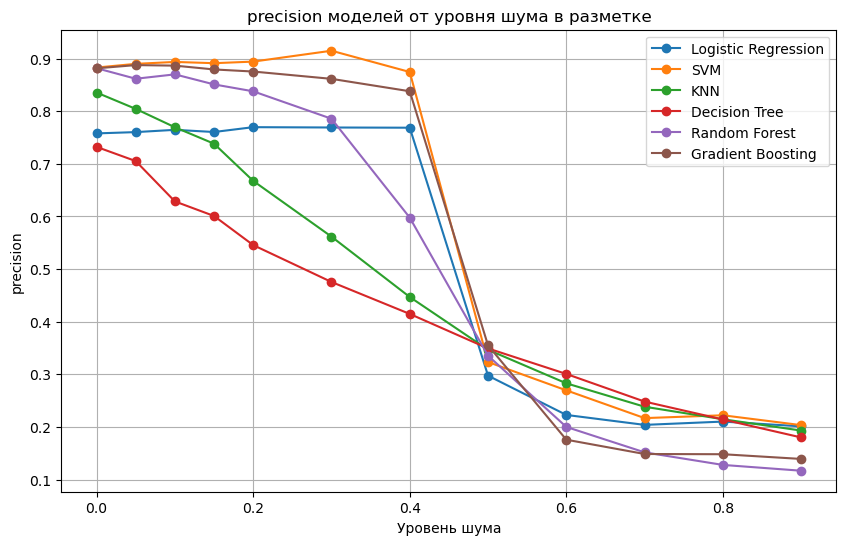

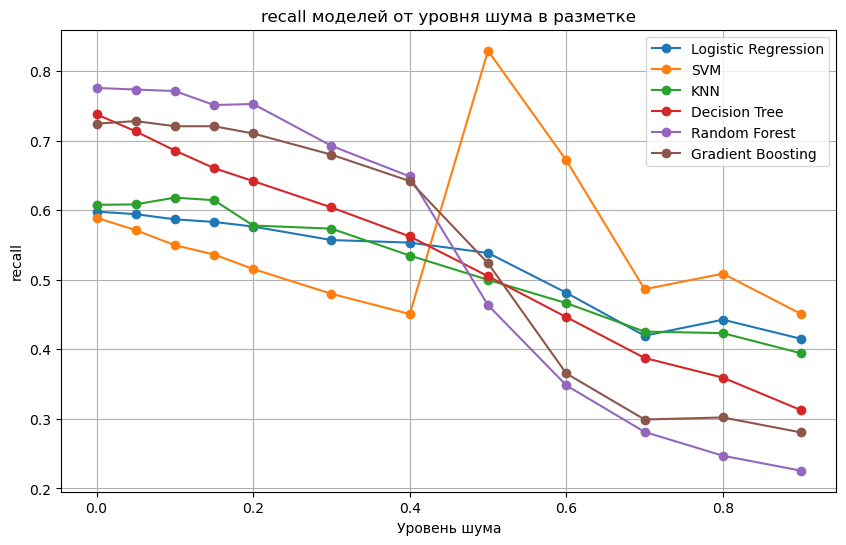

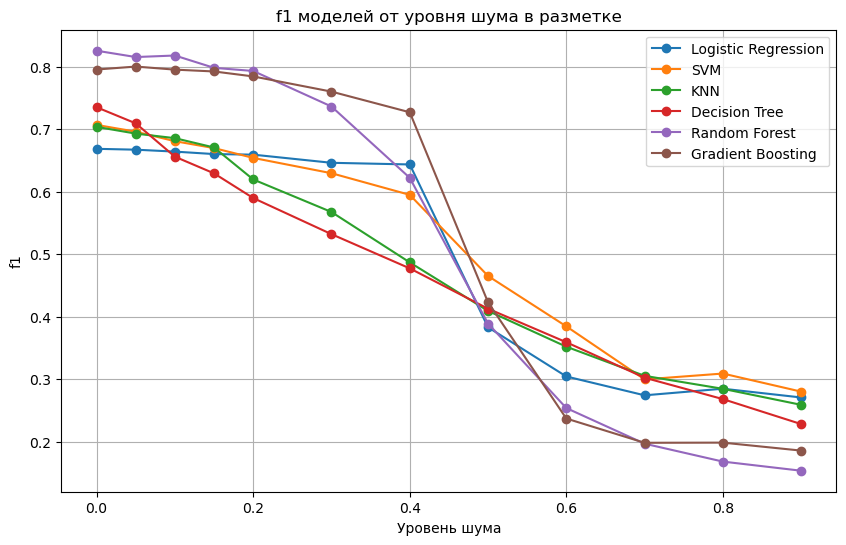

In [8]:
import matplotlib.pyplot as plt

def plot_metric_results(metric_name):
    model_metric_scores = {model_name: [] for model_name in models.keys()}
    for i, noise_level in enumerate(noise_levels):
        for model_name, metric_score in results[i][metric_name].items():
            model_metric_scores[model_name].append(metric_score)

    plt.figure(figsize=(10, 6))
    for model_name, metric_score_list in model_metric_scores.items():
        plt.plot(noise_levels, metric_score_list, label=model_name, marker='o')

    plt.xlabel('Уровень шума')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} моделей от уровня шума в разметке')
    plt.legend()
    plt.grid(True)
    plt.show()


for metric_name in ['accuracy', 'precision', 'recall', 'f1']:
    plot_metric_results(metric_name)

In [9]:
data_ratios = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125]
subset_results = []

for data_ratio in data_ratios:
    n_samples = int(len(X_train) * data_ratio)
    idx = np.random.choice(len(X_train), n_samples, replace=False)
    X_train_subset = X_train.iloc[idx, :]
    y_train_subset = y_train.iloc[idx]

    metrics_scores = train_and_evaluate_metrics(models, X_train_subset, y_train_subset, X_test, y_test)
    subset_results.append(metrics_scores)

for i, data_ratio in enumerate(data_ratios):
    print(f"Доля данных: {data_ratio * 100}%")
    for metric_name, model_scores in subset_results[i].items():
        print(f"Метрика: {metric_name}")
        for model_name, score in model_scores.items():
            print(f"{model_name}: {score:.4f}")
        print()
    print()

Доля данных: 100%
Метрика: accuracy
Logistic Regression: 0.7905
SVM: 0.8273
KNN: 0.8191
Decision Tree: 0.8120
Random Forest: 0.8817
Gradient Boosting: 0.8683

Метрика: precision
Logistic Regression: 0.7578
SVM: 0.8829
KNN: 0.8354
Decision Tree: 0.7321
Random Forest: 0.8801
Gradient Boosting: 0.8814

Метрика: recall
Logistic Regression: 0.5982
SVM: 0.5893
KNN: 0.6079
Decision Tree: 0.7381
Random Forest: 0.7701
Gradient Boosting: 0.7247

Метрика: f1
Logistic Regression: 0.6686
SVM: 0.7068
KNN: 0.7037
Decision Tree: 0.7351
Random Forest: 0.8214
Gradient Boosting: 0.7954


Доля данных: 50.0%
Метрика: accuracy
Logistic Regression: 0.7915
SVM: 0.8249
KNN: 0.8063
Decision Tree: 0.8168
Random Forest: 0.8712
Gradient Boosting: 0.8688

Метрика: precision
Logistic Regression: 0.7563
SVM: 0.8835
KNN: 0.8002
Decision Tree: 0.7373
Random Forest: 0.8631
Gradient Boosting: 0.8690

Метрика: recall
Logistic Regression: 0.6049
SVM: 0.5811
KNN: 0.6019
Decision Tree: 0.7478
Random Forest: 0.7552
Gradient B

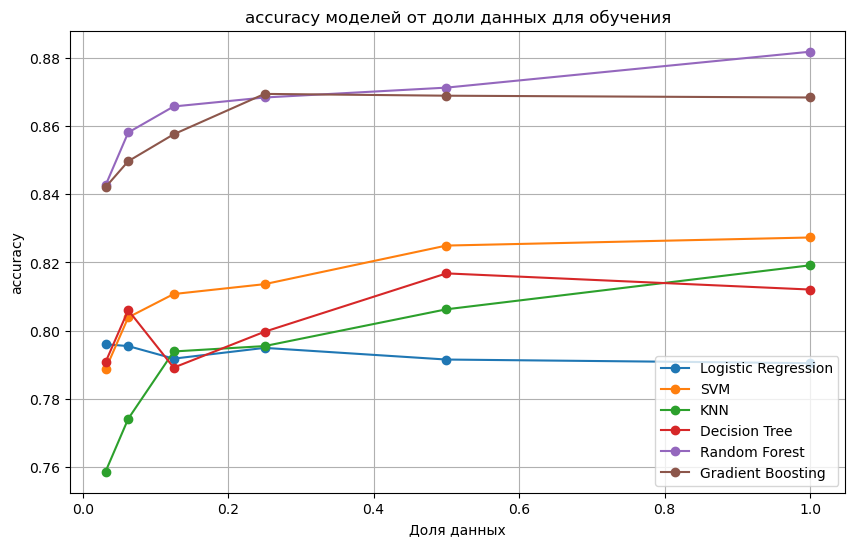

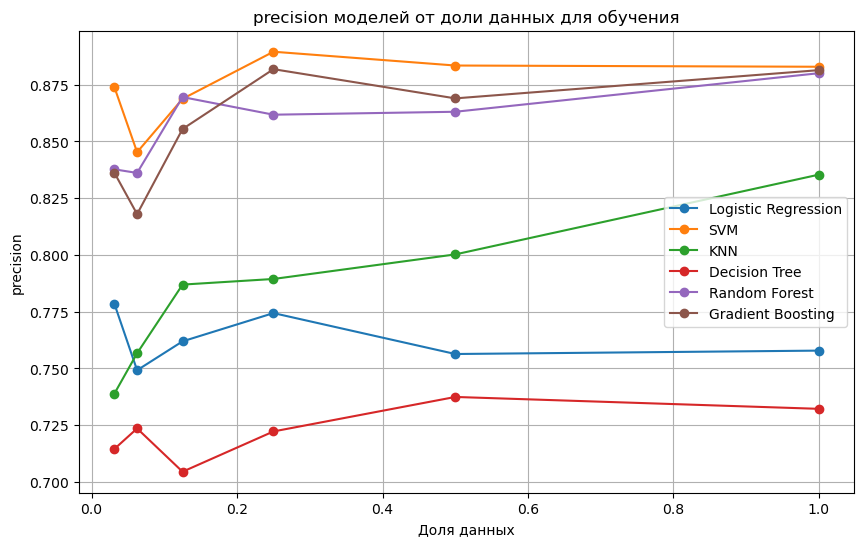

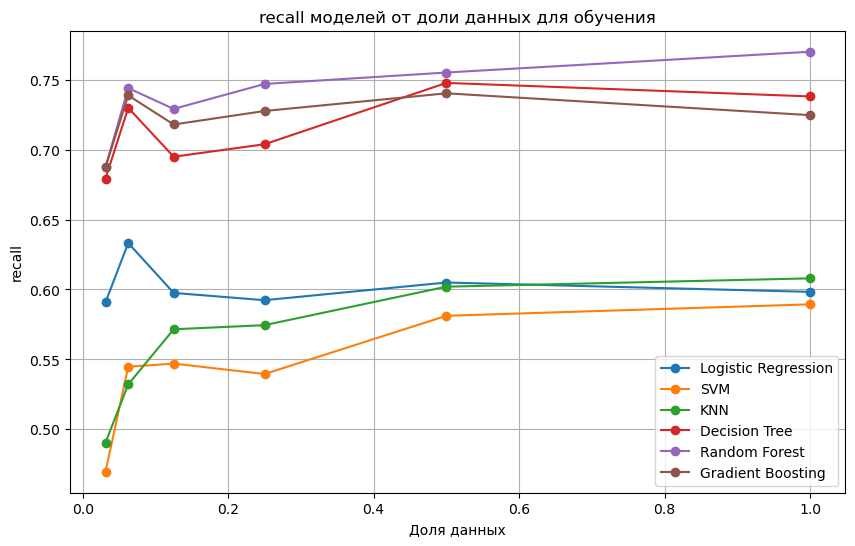

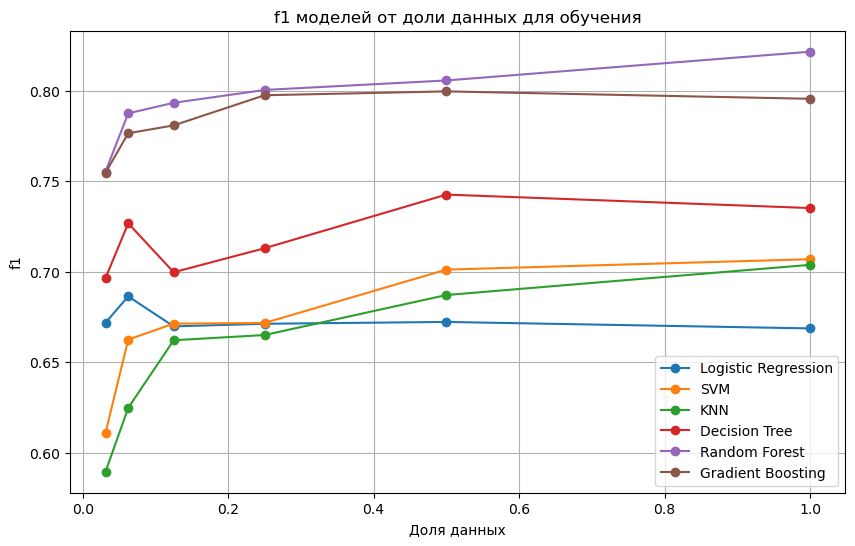

In [10]:
for metric_name in ['accuracy', 'precision', 'recall', 'f1']:
    model_metric_scores = {model_name: [] for model_name in models.keys()}
    for i, data_ratio in enumerate(data_ratios):
        for model_name, metric_score in subset_results[i][metric_name].items():
            model_metric_scores[model_name].append(metric_score)

    plt.figure(figsize=(10, 6))
    for model_name, metric_score_list in model_metric_scores.items():
        plt.plot(data_ratios, metric_score_list, label=model_name, marker='o')

    plt.xlabel('Доля данных')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} моделей от доли данных для обучения')
    plt.legend()
    plt.grid(True)
    plt.show()